In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker, cm, colors
from matplotlib.colors import LogNorm
import seaborn as sns
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import ode
import scipy.ndimage
import glob
import os
from fractions import Fraction
import csv
import itertools
import math
from scipy import stats
from scipy.stats import beta

In [2]:
# colormapをカスタマイズする
from matplotlib.colors import LinearSegmentedColormap

def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))

    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

#plotの文字定義
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams["mathtext.fontset"] = 'stix'

# 最も近い値の算出
def getNearest(list, num):
    """
    概要: リストからある値に最も近い値を返却する関数
    @param list: データ配列
    @param num: 対象値
    @return 対象値に最も近い値
    """

    # リスト要素と対象値の差分を計算し最小値のインデックスを取得
    idx = np.abs(np.asarray(list) - num).argmin()
    return idx

In [3]:
dt = 0.01
t_end=1
len_t = int(t_end/dt)
# tt_end=1.5
# len_tt = int(tt_end/dt)
print (len_t)
# p = 1
# # h=1
# a=3
# u=0.0001
# k=3

100


1.0000010099999397 2.0000020199998794
101


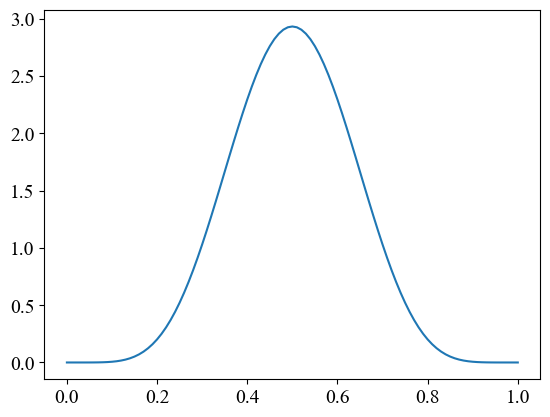

In [4]:
# h0_list = [0.61]
t3_list=[0]

# h0 = 0

a1 = 7
b1 = 7
t3_list = np.linspace(0, 1, len_t+1) #x軸
h0_list = 0.000001+beta.pdf(t3_list, a1, b1)#y軸
new_list = [n*2 for n in h0_list]
z=math.factorial(a1+b1-1)/(math.factorial(a1-1)*math.factorial(b1-1))
h_total=dt*sum(h0_list)
new_total=dt*sum(new_list)
plt.plot(t3_list, h0_list)
plt.savefig("h.png")
print(h_total, new_total)
print(len(h0_list))


In [5]:
#Caliculate V and s
#initial value

# h=1
p=1
u=0.01
a=16
# p_list=[i / 10 for i in range(0, 161, 1)]
# len_p=len(p_list)
x_list=[i / 10 for i in range(1, 51, 1)]
len_x=len(x_list)
k=4
value_t1_list=[]
value_t2_list=[]
value_tbar_list=[]
value_s_total_list=[]
value_s_h_list=[]
# masu=len_p*len_k
# df_t1 = pd.DataFrame(np.arange(masu).reshape(len_p, len_k),columns=k_list,index=p_list)
# df_t2 = pd.DataFrame(np.arange(masu).reshape(len_p, len_k),columns=k_list,index=p_list)
# df_s = pd.DataFrame(np.arange(masu).reshape(len_p, len_k),columns=k_list,index=p_list)

t1_t_list=[i / 100 for i in range(0, 51, 1)]
# t1_t_list=[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
# t1_t_list=[0, 0.1, 0.2, 0.3, 0.4, 0.5]
# print(t1_t_list)
len_t1=len(t1_t_list)

# print (len_t1)
for n in range(len_x):
    
        sa_list=[]
        sign_list=[]
        t2_t_list=[]
        l_t2_list=[]
        lamv_t2_list=[]
        s_total_list=[]
        s_h_list=[]

        x=x_list[n]
        # p=p_list[m]
        for j in range(len_t1):
            # print(j)
            t1 = t1_t_list[j]
            t2=1000
            # print(t1)
            # lam = 1/(b*h)

            #list
            # s_list =[s]
            # lam_list = [lam]
            s_list = [0]
            t_list = [0]
            v_list = [0]
            s_total=0

            for i in range(len_t):

                t = dt*(i + 1)
                t_list.append(t)
                # if i<=len_t:
                #     h = h0_list[i]
                # else:
                #     h=1
                h = x*h0_list[i+1]
                v = v_list[-1]

                kata1 = h/(2*(1+a*v)*(k+u))
                kata2 = -p+k*v
                kata3 = u+(h/(1+a*v))
                kata4 = pow(1+a*v, 2)/(h*a)
                kata5 = k+u+(h/(1+a*v))
                kata6 = (k+u)/h
                kata7 = z*(((a1-1)*pow(t,a1-2)*pow(1-t,b1-1))-((b1-1)*pow(t,a1-1)*pow(1-t,b1-2)))
                dv = kata1*(kata2+kata3*kata4*kata5+kata4*kata6*kata7)
                v1 = v + dv*dt
                s = dv - k*v1
                if s <= 0:
                    if i < t2:
                        t2=i
                    s_list.append(0)
                    v1 = v-k*v*dt
                    v_list.append(v1)
                elif t<t1:
                    s_list.append(0)
                    v_list.append(0)
                elif i==len_t-1:
                    s_list.append(0)
                    v1 = v-k*v*dt
                    v_list.append(v1)
                else:
                    s_list.append(s)
                    v_list.append(v1)
                    s_total+=s*dt

                # l_list.append(l1)
            #s_total

            l = 1
            l_list = [l]
            t1_list = [0]

            for i in range(len_t):
                t = dt*(i+1)
                t1_list.append(t)
                
                l = l_list[i]
                h = h0_list[i]
                v = v_list[i]
                l1= l-(u+(h/(1+a*v)))*l*dt
                l_list.append(l1)

            lam_l = 0
            lam_v = 0
            lam_l_list=[lam_l]
            lam_v_list=[lam_v]
            t2_list = [t_end]

            for i in range(len_t):
                t = dt*(len_t-(i+1))
                t2_list.append(t)

                h = h0_list[len_t-(i+1)]
                v = v_list[len_t-(i+1)]
                l = l_list[len_t-(i+1)]
                lam_l = lam_l_list[i]
                lam_v = lam_v_list[i]

                # lam_l1=lam_l-((p-s)-lam_l*(u+(h/(1+a*v))))*dt
                # lam_v1=lam_v-(lam_l*h*a/((1+a*v)*(1+a*v))-lam_v*k)*dt
                lam_l1=lam_l-(-(p-s)+lam_l*(u+(h/(1+a*v))))*dt
                lam_v1=lam_v-(-(lam_l*l*h*a)/((1+a*v)**2)+lam_v*k)*dt

                lam_l_list.append(lam_l1)
                lam_v_list.append(lam_v1)


            # # # print(len(s_list))
            # # # print(len(lam_v_list))

            #Lとlamvの差
            sa=l_list[t2]-lam_v_list[len_t-t2]
            sign=int(np.sign(sa))
            l_t2=l_list[t2]
            lam_t2=lam_v_list[len_t-t2]

            #リストへの追加
            sa_list.append(sa)
            sign_list.append(sign)
            t2_t_list.append(t2*dt)
            l_t2_list.append(l_t2)
            lamv_t2_list.append(lam_t2)
            s_total_list.append(s_total)
            s_h_list.append(s_list)
            # print(s_p_list)

    
        # data = pd.DataFrame()
        # data=pd.DataFrame([t1_t_list, t2_t_list,l_t2_list,lamv_t2_list,sa_list])
        # data = data.transpose()
        # print(data)
        # dataname="k="+str(k)+"_a="+str(a)+".csv"
        # data.to_csv(dataname)
    
        sum=0
        for i in range(len_t1):
            sum += sign_list[i]
        # print(sum)
        # sum=sum(sign_list)
        if sum==len_t1:
            value_t1=0
            value_t2=0
            value_s_total=0
        else:
            idx=getNearest(sa_list, 0)
            value_t1=t1_t_list[idx]
            value_t2=t2_t_list[idx]
            value_s_total=s_total_list[idx]
            value_s_h=s_h_list[idx]
            idx_t1=int(value_t1/dt)
            idx_t2=int((value_t2/dt))+1
            nakami_list=[x * y for (x, y) in zip(t_list, value_s_h)]
            # print(nakami_list)
            # print(type(idx_t1), type(idx_t2))
            # print(idx_t1, idx_t2)
            bunnsi=np.sum(nakami_list[idx_t1:idx_t2])
            bunnbo=np.sum(value_s_h[idx_t1:idx_t2])
            value_tbar =bunnsi/bunnbo
            
        # print(value_t1)
        # df_t1.iloc[m,n]=value_t1
        # df_t2.iloc[m,n]=value_t2
        # df_s.iloc[m,n]=value_s_total
        value_t1_list.append(value_t1)
        value_t2_list.append(value_t2)
        value_s_total_list.append(value_s_total)
        value_s_h_list.append(value_s_h)
        value_tbar_list.append(value_tbar)
# print(value_t1_list)
# print(value_s_p_list)

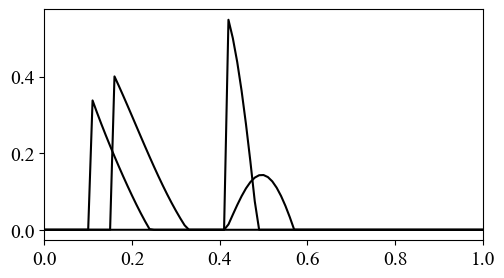

In [14]:
fig, ax = plt.subplots(figsize=(1.414*4, 3))
# ax.plot(t_list, value_s_p_list[0], color = "black", label="p=0")
ax.plot(t_list, value_s_h_list[1], color = "black", label="p=0.1")
# ax.plot(t_list, value_s_p_list[3], color = "black", label="p=1")
ax.plot(t_list, value_s_h_list[21], color = "black", label="p=4")
ax.plot(t_list, value_s_h_list[41], color = "black", label="p=8")
# fig.tight_layout()  # レイアウトの設定
ax.set_xlim(0, 1)
# ax.set_ylim(0, 1.5)
plt.savefig('fig4_sub_h.png')

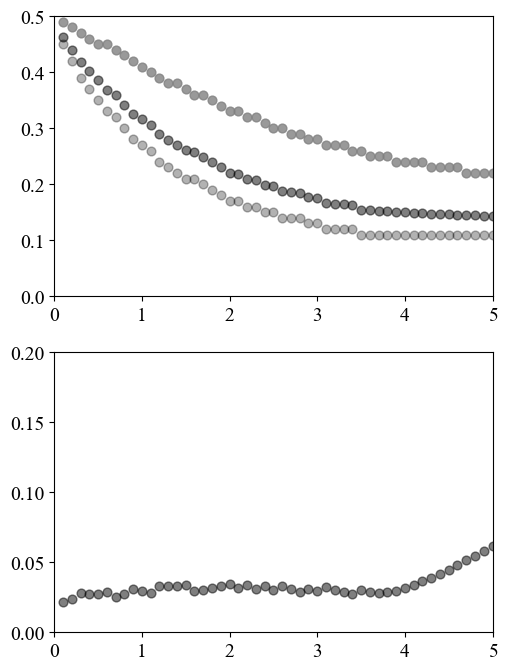

In [6]:
fig = plt.figure(figsize=(1.414*4, 8))
# fig, ax = plt.subplots()
ax1 = fig.add_subplot(2, 1, 1) #1行4列の１番目
ax1.scatter(x_list, value_t1_list, color = "black", s=40, alpha=0.3, label="t1")
ax1.scatter(x_list, value_t2_list, color = "gray",  s=40, alpha=0.8, label="t2")
ax1.scatter(x_list, value_tbar_list, color = "black",  s=40, alpha=0.5, label="tbar")
ax1.set_xlim([0,5])
ax1.set_ylim([0,0.5])
# ax1.legend()

ax2 = fig.add_subplot(2, 1, 2) #1行4列の１番目
ax2.scatter(x_list, value_s_total_list, color = "black", s=40, alpha=0.5, label="s_total")
ax2.set_xlim([0,5])
ax2.set_ylim([0,0.2])

# ax.legend()
plt.savefig('fig4_de.png')

In [6]:
# df_t1_sorted = df_t1.sort_index(ascending=False)
# df_t2_sorted = df_t2.sort_index(ascending=False)
# df_s_sorted = df_s.sort_index(ascending=False)

# fig = plt.figure(figsize=(16, 4))

# ax1 = fig.add_subplot(1, 3, 1)
# sns.heatmap(df_t1_sorted, ax=ax1, cmap='Blues')

# ax2 = fig.add_subplot(1, 3, 2)
# sns.heatmap(df_t2_sorted, ax=ax2, cmap='Blues')

# ax3 = fig.add_subplot(1, 3, 3)
# sns.heatmap(df_s_sorted, ax=ax3, cmap='Blues', vmax=0.2, vmin=0)

# plt.savefig('fig5_pk.png')

In [17]:
# df_t1_sorted = df_t1.sort_index(ascending=False)
# # print(df_t1_sorted)
# plt.figure()
# sns.heatmap(df_t1_sorted, cmap='Blues')
# plt.savefig('heatmap0528_t1.png')
# plt.close('all')

In [18]:
# df_t2_sorted = df_t2.sort_index(ascending=False)
# # print(df_t1_sorted)
# plt.figure()
# sns.heatmap(df_t2_sorted, cmap='Blues')
# plt.savefig('heatmap0528_t2.png')
# plt.close('all')

In [19]:
# #他と一緒の設定
# df_s_sorted = df_s.sort_index(ascending=False)
# # print(df_t1_sorted)
# plt.figure()
# sns.heatmap(df_s_sorted, cmap='Blues')
# plt.savefig('heatmap0528_s.png')
# plt.close('all')

In [20]:
# #対数をとってみる,グラフの設定は他と一緒
# df_s_log = np.log(df_s_sorted)
# # print(df_t1_sorted)
# plt.figure()
# sns.heatmap(df_s_log, cmap='Blues')
# plt.savefig('heatmap0528_s_log.png')
# plt.close('all')

In [24]:
# plt.figure()
# sns.heatmap(df_s_sorted, cmap='Blues', vmax=0.2, vmin=0)
# plt.savefig('heatmap0528_s_color_bar.png')
# plt.close('all')

In [6]:
# # #Caliculate L(Vと要素数がずれている可能性あり)
# l = 1

# l_list = [l]
# t_list = [0]

# for i in range(len_t-1):
#     t = dt*(i+1)
#     t_list.append(t)
    
#     l = l_list[i]
#     h = h0_list[i]
#     v = v_list[i]
#     l1= l-(u+(h/(1+a*v)))*l*dt
    
#     l_list.append(l1)
    
# # print(l_list)

In [7]:
# fig = plt.figure(figsize=(1.414*25, 4))

# ax1 = fig.add_subplot(1, 6, 1) #1行4列の１番目
# ax1.plot(t_list, v_list, color = "black", label="v")
# # ax1.set_ylim([0,1.2])
# ax1.legend()

# ax2 = fig.add_subplot(1, 6, 2) #1行4列の１番目
# ax2.plot(t_list, s_list, color = "black", label="s")
# #ax1.set_ylim([0,1])
# ax2.legend()

# ax3 = fig.add_subplot(1, 6, 3) #1行4列の１番目
# ax3.plot(t_list, l_list, color = "black", label="l")
# ax3.set_ylim([0,1])
# ax3.legend()

# ax4 = fig.add_subplot(1, 6, 4) #1行4列の１番目
# ax4.plot(t2_list, lam_l_list, color = "black", label="lambda_l")
# # ax4.set_ylim([0,1])
# ax4.legend()

# ax5 = fig.add_subplot(1, 6, 5) #1行4列の１番目
# ax5.plot(t2_list, lam_v_list, color = "black", label="lambda_v")
# ax5.set_ylim([0,0.5])
# ax5.legend()

# ax6 = fig.add_subplot(1, 6, 6) #1行4列の１番目
# ax6.plot(t3_list, h0_list, color = "black", label="h")
# # ax6.set_ylim([0,1])
# ax6.legend()

# figname="a="+str(m)+",t1="+str(t1)+".png"
# plt.savefig(figname)

In [8]:
# fig = plt.figure(figsize=(1.414*20, 4))

# ax1 = fig.add_subplot(1, 4, 1)   #1行4列の１番目
# ax1.plot(t_list, s_list, color = "black", label="s")
# #ax1.set_ylim([0,1])
# ax1.legend()

# ax2 = fig.add_subplot(1, 4, 2)   #１行4列の２番目
# ax2.plot(t_list, lam_list, color = "black", label="lambda")
# #ax2.set_ylim([0,1])
# ax2.legend()

# ax3 = fig.add_subplot(1, 4, 3)   #1行4列の3番目
# ax3.plot(tt_list, l_list, color = "black", label="L")
# ax3.set_ylim([0,1])
# ax3.legend()

# ax4 = fig.add_subplot(1, 4, 4)   #１行4列の4番目
# ax4.plot(tt_list, v_list, color = "black", label="V")
# ax4.set_ylim([0,1])
# ax4.legend()

# plt.savefig("slamLV.png")